In [24]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [25]:
dataf = pandas.read_csv(r'letter-recognition.csv')

In [26]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [27]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [28]:
help_ar = []
for i in range(len(dataf["letter"])):
    help_ar.append(ord(dataf["letter"][i])-64)
#y = help_ar
#dataf.pop("letter")
y = dataf.pop("letter")
#dataf.info()


In [29]:
scaler = MinMaxScaler()
scaler.fit(dataf)
dataf = pandas.DataFrame(scaler.transform(dataf),columns=dataf.columns)
dataf.describe()
#y = dataf.pop("letter")
x = dataf

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

C:\Users\nohop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of samples')

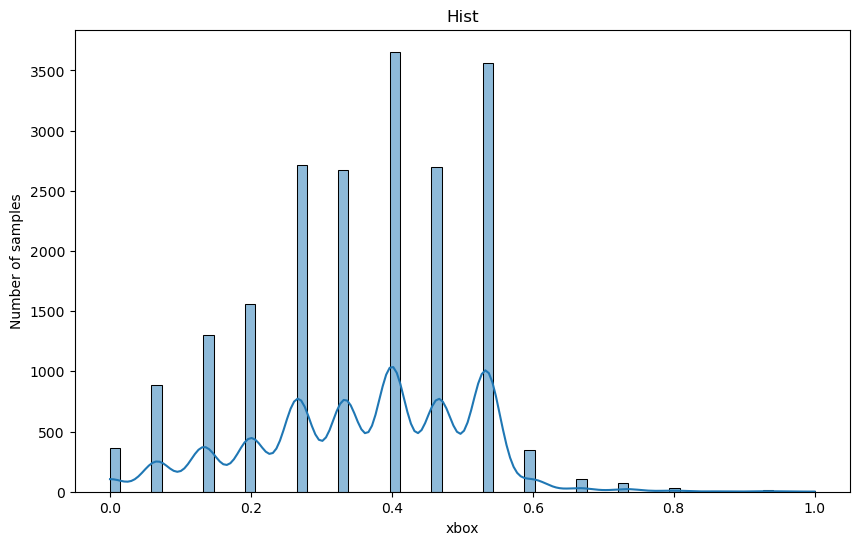

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(dataf["height"], kde = True)
plt.title("Hist")
plt.xlabel('xbox')
plt.ylabel('Number of samples')
#plt.show()

In [33]:
#wyglada brzydko, ale za to nie dziala xd

def tl(filepath):
    img = Image.open(filepath)
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later
#those seem legit
    x_box = np.min(on_pixels[:, 1]) / np_img.shape[1]
    y_box = np.min(on_pixels[:, 0]) / np_img.shape[0]
    width = (np.max(on_pixels[:, 1]) - np.min(on_pixels[:, 1])) / np_img.shape[1]
    height = (np.max(on_pixels[:, 0]) - np.min(on_pixels[:, 0])) / np_img.shape[0]
    onpix = len(on_pixels) / (np_img.shape[0] * np_img.shape[1])
#versions according to an article
    x_bar = (np.mean(on_pixels[:, 1]) - (np.min(on_pixels[:, 1]) + 0.5*width)) / width
    y_bar = (np.mean(on_pixels[:, 0]) - (np.min(on_pixels[:, 0]) + 0.5*height)) / height
    print(x_bar)
    print(y_bar)
    #x2bar = 


    
    x_bar = np.mean(on_pixels[:, 1]) / np_img.shape[1]
    y_bar = np.mean(on_pixels[:, 0]) / np_img.shape[0]
    x2bar = np.var(on_pixels[:, 1]) / (np_img.shape[1] ** 2)
    y2bar = np.var(on_pixels[:, 0]) / (np_img.shape[0] ** 2)
    xybar = np.mean(on_pixels[:, 0] * on_pixels[:, 1]) / (np_img.shape[0] * np_img.shape[1])
    x2ybar = np.mean(on_pixels[:, 1] ** 2 * on_pixels[:, 0]) / (np_img.shape[1] ** 2 * np_img.shape[0])
    xy2bar = np.mean(on_pixels[:, 1] * on_pixels[:, 0] ** 2) / (np_img.shape[1] * np_img.shape[0] ** 2)
#those are sussy
    sobel_x = ndimage.sobel(np_img, axis=1, mode='constant')
    sobel_y = ndimage.sobel(np_img, axis=0, mode='constant')
    xedge = np.sum(sobel_x > 0) / (np_img.shape[0] * np_img.shape[1])
    yedge = np.sum(sobel_y > 0) / (np_img.shape[0] * np_img.shape[1])
    #xedgey = 
    #yedgex = 
    edges_x = np.diff(np_img, axis=1)
    edges_y = np.diff(np_img, axis=0)
    edge_count_x = np.sum(edges_x > 0, axis=1) / np_img.shape[1]
    edge_count_y = np.sum(edges_y > 0, axis=0) / np_img.shape[0]
# Calculate the means of x and y coordinates
    mean_x = np.mean(on_pixels[:, 1])
    mean_y = np.mean(on_pixels[:, 0])
# Calculate the standard deviations of x and y coordinates
    mean_y_per_row = [np.mean(on_pixels[on_pixels[:, 0] == i, 1]) if i in on_pixels[:, 0] else 0 for i in range(np_img.shape[0])]
    mean_x_per_col = [np.mean(on_pixels[on_pixels[:, 1] == i, 0]) if i in on_pixels[:, 1] else 0 for i in range(np_img.shape[1])]
# Calculate the correlations
    x_ege = np.corrcoef(edge_count_x, mean_y_per_row)[0, 1]
    y_ege = np.corrcoef(edge_count_y, mean_x_per_col)[0, 1]
# Normalize to the range [0, 1]
    xedgey = (x_ege + 1) / 2
    yedgex = (y_ege + 1) / 2
    return [x_box, y_box, width, height, onpix, x_bar, y_bar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, x_ege, yedge, y_ege]

In [4]:
#drugie podejscie do zamiany obrazkow na dane tym razem zgodnie z tym artykulem
def tl2(filepath):
    img = Image.open(filepath)
    img_gs = img.convert("L")
    np_img = np.array(img_gs)
    on_pixels = np.where(np_img<255)
    on_pixels = np.array(on_pixels).T #added later

    #tutaj uznalem ze moze lepiej bedzie najpierw policzyc koordynaty wszystkie a potem dopiero je znormalizowac
    xbox = np.min(on_pixels[:, 1])
    ybox = np.min(on_pixels[:, 0])
    width = np.max(on_pixels[:, 1]) - xbox
    height = np.max(on_pixels[:, 0]) - ybox
    onpix = len(on_pixels)
    xbar = (np.mean(on_pixels[:, 1]) - (xbox + 0.5*width)) / width
    ybar = (np.mean(on_pixels[:, 0]) - (ybox + 0.5*height)) / height
    
    #zmienne pomocnicze
    xd_square = [] #kwadraty odleglosci od srodka pudelka poziome i pionowe
    yd_square = []
    x_distance = []
    y_distance = []
    xy_distance = []

    x2y_d = []
    xy2_d = []
    for i in range(len(on_pixels[:, 1])):
        xd_square.append((on_pixels[:, 1][i] - (xbox + 0.5*width))**2)
        yd_square.append((on_pixels[:, 0][i] - (ybox + 0.5*height))**2)
        x_distance.append((on_pixels[:, 1][i] - (xbox + 0.5*width))
        y_distance.append((on_pixels[:, 0][i] - (ybox + 0.5*height))
        xy_distance.append(x_distance[i] * y_distance[i])
        x2y_d.append(xd_square[i] * y_distance[i])
        xy2_d.append(yd_square[i] * x_distance[i])
    
    x2bar = np.mean(xd_square)
    y2bar = np.mean(yd_square)
    xybar = np.mean(xy_distance)
    x2ybar = np.mean(x2y_d)
    xy2bar = np.mean(xy2_d)
    
        
    

In [34]:
from sklearn.neighbors import KNeighborsClassifier
test_mfs = [tl("letterA.png"), tl("letterL.png"),tl("letterB.png"),tl("letterC.png"),tl("letterS.png"),tl("letterI.png"),tl("letterM.png")]
df = pandas.DataFrame(test_mfs, columns=x.columns)
knn_lib=KNeighborsClassifier(2)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)
predictions = knn_lib.predict(df)
print(predictions)

27.457136237256723
29.87307852098047
10.604761904761899
38.440886699507395
45.928244224854396
39.61178517042008
23.231256952169076
29.32029897718332
23.368961352657006
32.118896126849464
23.000000000000007
31.5
32.32258064516129
28.17609884927372
['A' 'V' 'A' 'A' 'A' 'J' 'A']


In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show